In [1]:
import numpy as np
import pandas as pd

In [4]:
course_df = pd.read_csv("Course_info.csv")

In [5]:
course_df.head()

,id,title,is_paid,price,headline,num_subscribers,avg_rating,num_reviews,num_comments,num_lectures,content_length_min,published_time,last_update_date,category,subcategory,topic,language,course_url,instructor_name,instructor_url
0,4715.0,Online Vegan Vegetarian Cooking School,True,24.99,Learn to cook delicious vegan recipes. Filmed ...,2231.0,3.75,134.0,42.0,37.0,1268.0,2010-08-05T22:06:13Z,2020-11-06,Lifestyle,Food & Beverage,Vegan Cooking,English,/course/vegan-vegetarian-cooking-school/,Angela Poch,/user/angelapoch/
1,1769.0,The Lean Startup Talk at Stanford E-Corner,False,0.00,Debunking Myths of Entrepreneurship A startup ...,26474.0,4.50,709.0,112.0,9.0,88.0,2010-01-12T18:09:46Z,NaN,Business,Entrepreneurship,Lean Startup,English,/course/the-lean-startup-debunking-myths-of-en...,Eric Ries,/user/ericries/
2,5664.0,"How To Become a Vegan, Vegetarian, or Flexitarian",True,19.99,Get the tools you need for a lifestyle change ...,1713.0,4.40,41.0,13.0,14.0,82.0,2010-10-13T18:07:17Z,2019-10-09,Lifestyle,Other Lifestyle,Vegan Cooking,English,/course/see-my-personal-motivation-for-becomin...,Angela Poch,/user/angelapoch/
3,7723.0,How to Train a Puppy,True,199.99,Train your puppy the right way with Dr. Ian Du...,4988.0,4.80,395.0,88.0,36.0,1511.0,2011-06-20T20:08:38Z,2016-01-13,Lifestyle,Pet Care & Training,Pet Training,English,/course/complete-dunbar-collection/,Ian Dunbar,/user/ian-dunbar/
4,8157.0,Web Design from the Ground Up,True,159.99,Learn web design online: Everything you need t...,1266.0,4.75,38.0,12.0,38.0,569.0,2011-06-23T18:31:20Z,NaN,Design,Web Design,Web Design,English,/course/web-design-from-the-ground-up/,E Learning Lab,/user/edwin-ang-2/


In [6]:
course_df.corr()

,id,is_paid,price,num_subscribers,avg_rating,num_reviews,num_comments,num_lectures,content_length_min
id,1.000000,0.002794,-0.006701,-0.147775,-0.256726,-0.105234,-0.133923,-0.116034,-0.049740
is_paid,0.002794,1.000000,0.236707,-0.087247,-0.089873,-0.008471,-0.012674,0.132016,0.130122
price,-0.006701,0.236707,1.000000,0.017964,0.031457,0.032550,0.039304,0.150983,0.154961
num_subscribers,-0.147775,-0.087247,0.017964,1.000000,0.077144,0.736819,0.730623,0.180190,0.119574
avg_rating,-0.256726,-0.089873,0.031457,0.077144,1.000000,0.048506,0.060731,0.146017,0.108175
num_reviews,-0.105234,-0.008471,0.032550,0.736819,0.048506,1.000000,0.951832,0.186023,0.125941
num_comments,-0.133923,-0.012674,0.039304,0.730623,0.060731,0.951832,1.000000,0.202704,0.137998
num_lectures,-0.116034,0.132016,0.150983,0.180190,0.146017,0.186023,0.202704,1.000000,0.729714
content_length_min,-0.049740,0.130122,0.154961,0.119574,0.108175,0.125941,0.137998,0.729714,1.000000


In [7]:
course_df["id"] = course_df["id"].astype("int64")
course_df["num_subscribers"] = course_df["num_subscribers"].astype("int64")
course_df = course_df[["id", "num_subscribers", "avg_rating"]]

In [8]:
course_df.head()

,id,num_subscribers,avg_rating
0,4715,2231,3.75
1,1769,26474,4.50
2,5664,1713,4.40
3,7723,4988,4.80
4,8157,1266,4.75


In [9]:
course_df[course_df.duplicated()]

,id,num_subscribers,avg_rating


In [10]:
course_df.isnull().sum()

id                 0
num_subscribers    0
avg_rating         0
dtype: int64

In [11]:
course_df.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
id,209734.0,3015403.09,1342558.02,1769.0,1950733.5,3292863.00,4189458.50,4914146.0
num_subscribers,209734.0,3096.99,15581.32,0.0,26.0,206.00,1435.00,1752364.0
avg_rating,209734.0,3.75,1.53,0.0,3.8,4.33,4.62,5.0


In [13]:
review_df = pd.read_csv("Comments.csv")

In [14]:
review_df.head()

,id,course_id,rate,date,display_name,comment
0,88962892,3173036,1.0,2021-06-29T18:54:25-07:00,Rahul,I think a beginner needs more than you think.\...
1,125535470,4913148,5.0,2022-10-07T11:17:41-07:00,Marlo,Aviva is such a natural teacher and healer/hea...
2,68767147,3178386,3.5,2020-10-19T06:35:37-07:00,Yamila Andrea,Muy buena la introducción para entender la bas...
3,125029758,3175814,5.0,2022-09-30T21:13:49-07:00,Jacqueline,This course is the best on Udemy. This breakd...
4,76584052,3174896,4.5,2021-01-30T08:45:11-08:00,Anthony,I found this course very helpful. It was full ...


In [15]:
review_df.isnull().sum()

id                  0
course_id           0
rate                0
date                0
display_name    75362
comment          6333
dtype: int64

In [16]:
review_df = review_df.dropna()

In [17]:
review_df.isnull().sum()

id              0
course_id       0
rate            0
date            0
display_name    0
comment         0
dtype: int64

In [18]:
comments_df = review_df[["comment", "rate"]]

In [19]:
review_df = review_df.drop(["date", "comment"], axis=1)

In [20]:
review_df.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
id,9330843.0,55820959.39,37355384.29,54.0,22329854.0,52541996.0,85092457.0,126709072.0
course_id,9330843.0,1590114.70,1100016.95,1769.0,764164.0,1333640.0,2242248.0,4913148.0
rate,9330843.0,4.51,0.86,0.5,4.0,5.0,5.0,5.0


In [21]:
review_df["display_name"].nunique()

1420446

In [22]:
review_df["display_name"].value_counts()

Anonymized     147588
David           50770
Michael         44323
Daniel          39046
John            36329
                ...  
大塚敬子                1
沼田和也                1
渡邊沙耶香               1
志村海星                1
Rao Saurabh         1
Name: display_name, Length: 1420446, dtype: int64

In [23]:
len(course_df)

209734

In [24]:
len(course_df[course_df["num_subscribers"] > 1000])

63611

In [25]:
subs = {"0-100" : len(course_df[course_df["num_subscribers"] < 100]),
        "100-1000" : len(course_df[(course_df["num_subscribers"] >= 100) & (course_df["num_subscribers"] < 1000)]),
        "1000-10.000" : len(course_df[(course_df["num_subscribers"] >= 1000) & (course_df["num_subscribers"] < 10000)]),
        "10.000-100.000" : len(course_df[(course_df["num_subscribers"] >= 10000) & (course_df["num_subscribers"] < 100000)]),
        "100.000-1.000.000" : len(course_df[(course_df["num_subscribers"] >= 100000) & (course_df["num_subscribers"] < 1000000)]),
        "> 1.000.000" : len(course_df[course_df["num_subscribers"] >= 1000000]["num_subscribers"])}

In [26]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Number of Subscribers For Each Interval')

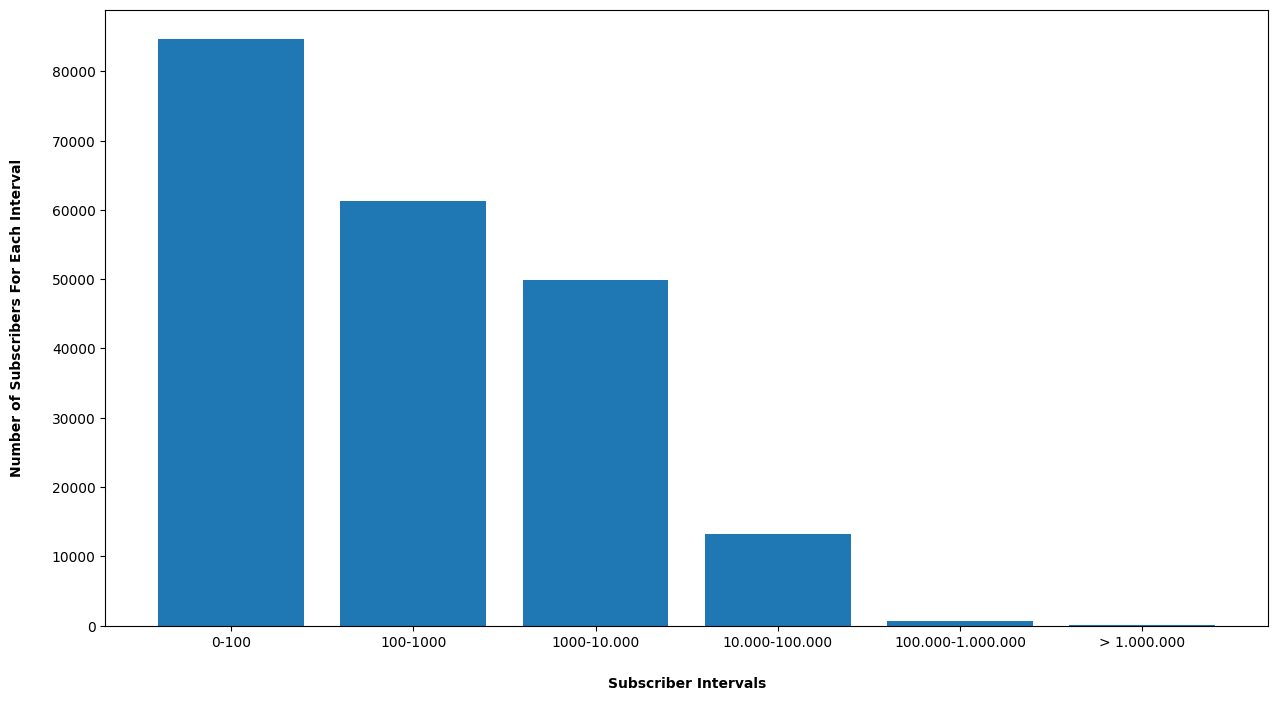

In [27]:
plt.figure(figsize=(15,8))
plt.bar(subs.keys(), subs.values())
plt.xlabel("Subscriber Intervals", weight='bold', labelpad=20)
plt.ylabel("Number of Subscribers For Each Interval", weight='bold', labelpad=20)

In [28]:
filtered_course_df = course_df[course_df["num_subscribers"] < 1000]
course_df = course_df[course_df["num_subscribers"] >= 1000]

In [29]:
redundant_course_id = filtered_course_df["id"]

In [30]:
len(review_df)

9330843

In [31]:
review_df.head()

,id,course_id,rate,display_name
0,88962892,3173036,1.0,Rahul
1,125535470,4913148,5.0,Marlo
2,68767147,3178386,3.5,Yamila Andrea
3,125029758,3175814,5.0,Jacqueline
4,76584052,3174896,4.5,Anthony


In [32]:
review_df = review_df[~review_df["course_id"].isin(redundant_course_id)].reset_index().drop(["index"], axis=1)
review_df.head()

,id,course_id,rate,display_name
0,115959558,4703788,5.0,Ghefar
1,61446778,3231279,1.0,Marc
2,126577120,4217850,1.0,Hrishikesh
3,109351744,4218444,5.0,Dhirendra
4,117967970,4662140,4.0,Robert


In [33]:
reviewer_names = review_df["display_name"].value_counts()

In [34]:
a = reviewer_names[(reviewer_names>10) & (reviewer_names<15)]

In [35]:
a.axes[0]

Index(['Sayda', 'Tagor', 'Mehmet Yusuf', 'Samarth Ganesh', 'jitendra', 'JOJO',
       'Makhmud', 'Elivânia', 'Nsikan', 'Julio Ariel',
       ...
       'Rodrigo Luís', 'Wahi', '小坂', 'Luís Carlos de Souza', 'Nastaran',
       'Yogapriya', 'Alexander Booth', 'Elias Ferreira', 'Darrell J',
       'AbdulHakim'],
      dtype='object', length=15341)

In [36]:
review_df = review_df.loc[review_df['display_name'].isin(a.axes[0])]
review_df = review_df.drop_duplicates()
review_df = review_df.dropna()
review_df

,id,course_id,rate,display_name
113,121094130,3271092,5.0,Kikotey
132,123193668,4853212,5.0,Mmesoma
168,125342834,4864152,4.5,Onuh
179,113949962,4676170,5.0,Camilo A.
197,70037296,3582509,5.0,Patil Pramod
...,...,...,...,...
8388048,54913226,567828,5.0,Alejandro Flores
8388049,54909770,567828,5.0,Sirous
8388064,54860280,567828,5.0,Parshwa
8388071,54833684,567828,5.0,Md Saifur


In [37]:
from sklearn.preprocessing import LabelEncoder

In [38]:
le = LabelEncoder()
reviewer_id = le.fit_transform(review_df["display_name"])
review_df.insert(1, "user_id", reviewer_id, True)
review_df

,id,user_id,course_id,rate,display_name
113,121094130,7153,3271092,5.0,Kikotey
132,123193668,8973,4853212,5.0,Mmesoma
168,125342834,10092,4864152,4.5,Onuh
179,113949962,2147,4676170,5.0,Camilo A.
197,70037296,10339,3582509,5.0,Patil Pramod
...,...,...,...,...,...
8388048,54913226,609,567828,5.0,Alejandro Flores
8388049,54909770,12592,567828,5.0,Sirous
8388064,54860280,10325,567828,5.0,Parshwa
8388071,54833684,8675,567828,5.0,Md Saifur


In [37]:
review_df = review_df[["user_id", "display_name", "course_id", "rate"]]
review_df

,user_id,display_name,course_id,rate
113,7153,Kikotey,3271092,5.0
132,8973,Mmesoma,4853212,5.0
168,10092,Onuh,4864152,4.5
179,2147,Camilo A.,4676170,5.0
197,10339,Patil Pramod,3582509,5.0
...,...,...,...,...
8388048,609,Alejandro Flores,567828,5.0
8388049,12592,Sirous,567828,5.0
8388064,10325,Parshwa,567828,5.0
8388071,8675,Md Saifur,567828,5.0


In [45]:
review_df[review_df["display_name"] == "Edrick"]

,id,user_id,course_id,rate,display_name
548689,48449826,3556,1724502,3.0,Edrick
744499,114704628,3556,3710108,5.0,Edrick
4497755,90613202,3556,619692,5.0,Edrick
4988477,24798852,3556,858578,5.0,Edrick
6388530,106467246,3556,1575836,5.0,Edrick
6607347,67746412,3556,2259510,5.0,Edrick
6806897,48326806,3556,888716,5.0,Edrick
7039841,62919654,3556,802576,5.0,Edrick
7859446,107646,3556,24823,5.0,Edrick
7982233,83397354,3556,258316,5.0,Edrick


In [44]:
review_df['display_name'].value_counts()

Kikotey                    14
Sara Jo                    14
Pushpam                    14
Obadiah                    14
web                        14
                           ..
Reesha                     11
Luis Fernando Fernández    11
Abdulbari                  11
Chitwinder                 11
Edrick                     11
Name: display_name, Length: 15341, dtype: int64

In [48]:
utility_matrix = pd.pivot_table(review_df, values="rate", columns="course_id", index="user_id")
utility_matrix

course_id,1769,2762,7723,8075,8082,8139,8324,8420,8467,8776,...,4885918,4887116,4889834,4890154,4890664,4891792,4896176,4900172,4900658,4907190
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15336,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15337,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15338,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [49]:
utility_matrix.notna().sum().max()

655

In [ ]:
utility_matrix.to_csv("m_utma.csv")